# categorical data
Plotting when one of the main variable is categorical

Three main family of plots
- Categorical scatterplots:

    - stripplot() (with kind="strip"; the default)
    - swarmplot() (with kind="swarm")

- Categorical distribution plots:

    - boxplot() (with kind="box")
    - violinplot() (with kind="violin")
    - boxenplot() (with kind="boxen")

- Categorical estimate plots:

    - pointplot() (with kind="point")
    - barplot() (with kind="bar")
    - countplot() (with kind="count")

## Categorical scatterplots

We'll use higher level interface **catplot**

In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
tips = sns.load_dataset("tips")
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


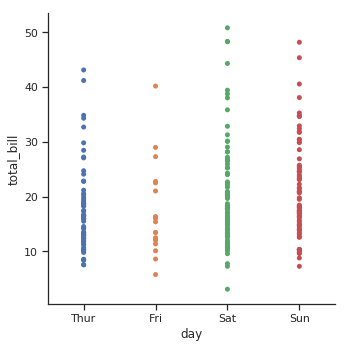

In [3]:
#The default representation of the data in catplot() uses a scatterplot.
sns.catplot(x="day", y="total_bill", jitter=False, data=tips);

As you can see, all of the points belonging to one category  fall on the same position along the categorical variable axis.

stripplot(default kind of catplot), adjust the positions of points on the categorical axis with a small amount of random “jitter”

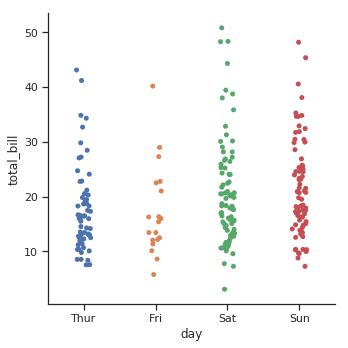

In [4]:

sns.catplot(x="day", y="total_bill", data=tips);


Other approach(swarmplot) adjusts the points along the categorical axis to avoid overlap.

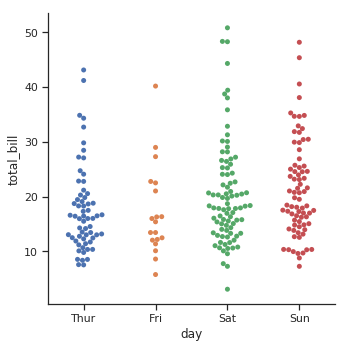

In [5]:
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips);

Again, we can plot more than two variable using **hue**.

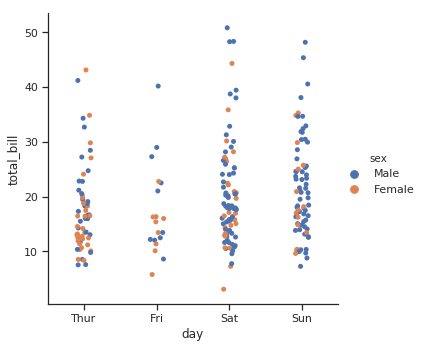

In [7]:
sns.catplot(x="day", y="total_bill", hue="sex", data=tips);

Scalar data has an inherent order defined by real line $\mathbb{R}$. For categorical data it is not very clear. Seaborn makes best guess but you can always control the order.



# categorical(discrete) variables
- **nominal variable**: has no intrinsic ordering to its categories like color
- **ordinal variable**: has a clear ordering like low high medium




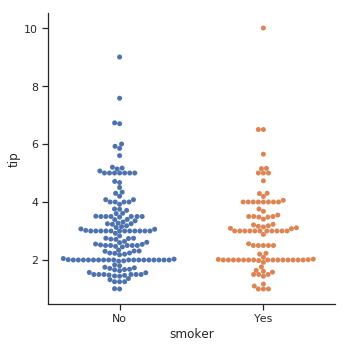

In [8]:
sns.catplot(x="smoker", y="tip",kind= 'swarm',  order=["No", "Yes"], data=tips);

If category names are relatively long or there are many categories, swap x and y

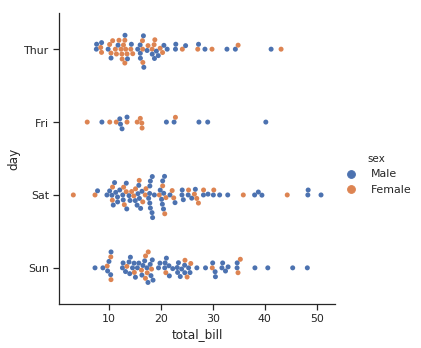

In [9]:
sns.catplot(x="total_bill", y="day", hue="sex", kind="swarm", data=tips);

# Distributions of observations within categories

Scatter plots are limited in visualizing distribution of values when we have lots of datapoints.

One can visualize the summary of distribution in these scenarios.

# Box plot (well known graphical representations of a probability distribution)



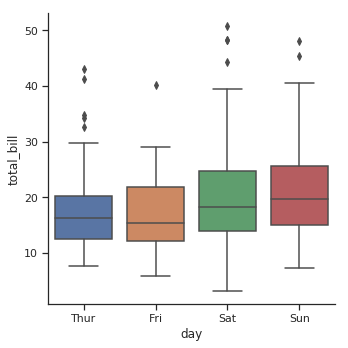

In [10]:
# Q1(25), Q2(50), Q3, IQR = Q3-Q1
# outlier ouside Q1-1.5IQR Q3+1.5IQR
# Note: outlier as displayed as individual points
sns.catplot(x="day", y="total_bill", kind="box", data=tips);

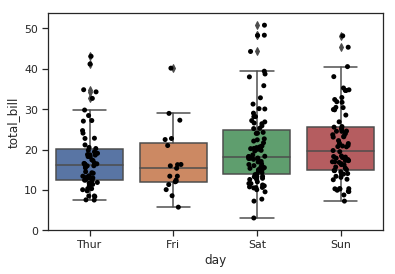

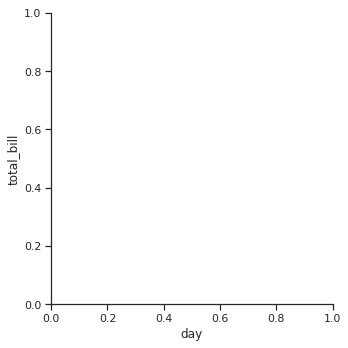

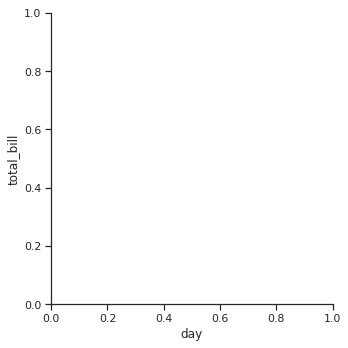

In [11]:
# Let's overlay points
fig, ax = plt.subplots()

sns.catplot(x="day", y="total_bill", kind="box", data=tips, ax= ax);
sns.catplot(x="day", y="total_bill", kind="strip",color='black' , data=tips, ax=ax);

## Again we can play with *hue* semantics

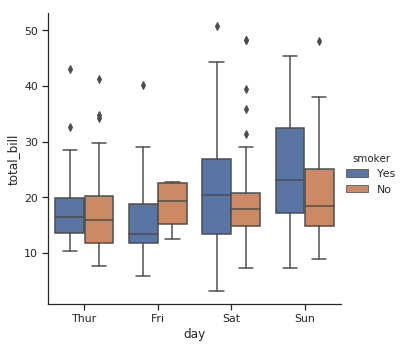

In [12]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips);

Above default behavior is called “dodging” and assumes that the semantic variable is nested within the main categorical variable. If that’s not the case, you can disable the dodging.

seaborn does it best if nesting is not possible.



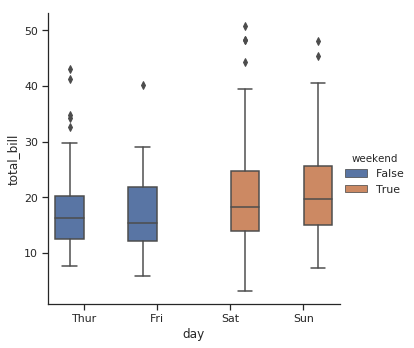

In [14]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sns.catplot(x="day", y="total_bill", hue="weekend",
            kind="box", data=tips);

For large data set, we can better see the shape of the distribution using **boxen** plot

Here is the paper for more information

https://vita.had.co.nz/papers/letter-value-plot.html

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


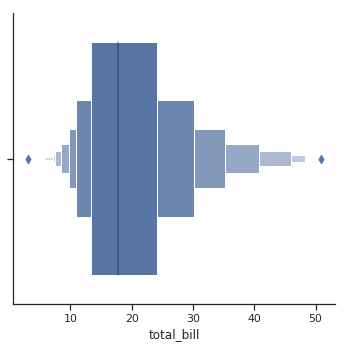

In [15]:
sns.catplot(x='total_bill', kind="boxen", data=tips)

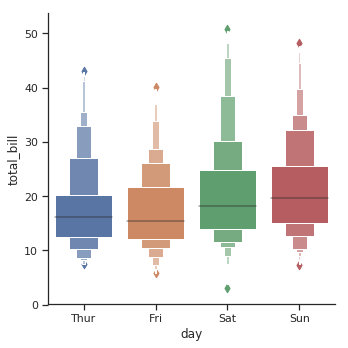

In [16]:
# try plot by smoker
sns.catplot(x='day', y='total_bill', kind="boxen", data=tips)

# Violinplots ( boxplot + kernel density estimation )

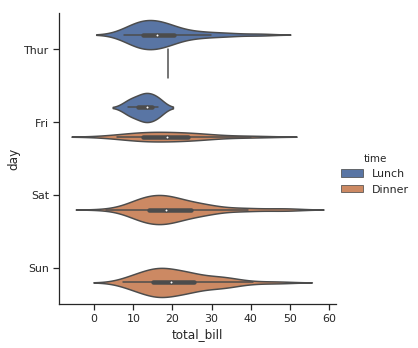

In [17]:
sns.catplot(x="total_bill", y="day", hue="time",
            kind="violin", data=tips)

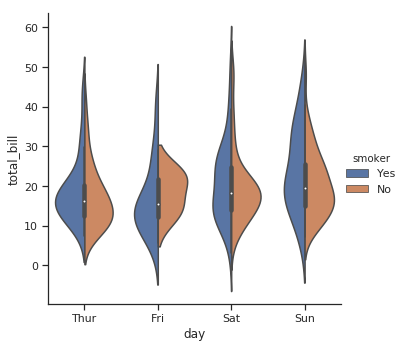

In [18]:
sns.catplot(x="day", y="total_bill", hue="smoker",
            kind="violin", split=True, data=tips)

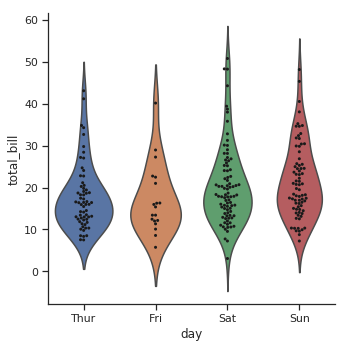

In [19]:
g = sns.catplot(x="day", y="total_bill", kind="violin", inner=None, data=tips)
sns.swarmplot(x="day", y="total_bill", color="k", size=3, data=tips, ax=g.ax);

# Statistical estimation(central tendency) within categories

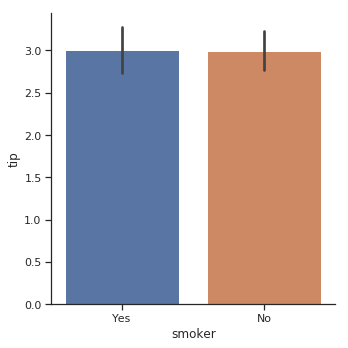

In [20]:
sns.catplot(x="smoker", y="tip", kind="bar", data=tips)

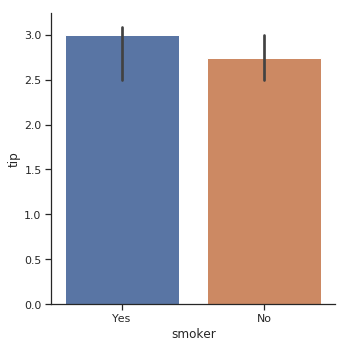

In [22]:
# from tips data set display bar plot of median tip for smoker(yes/no)
import numpy as np

sns.catplot(x="smoker", y="tip", kind="bar",estimator=np.median, data=tips)

In [23]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


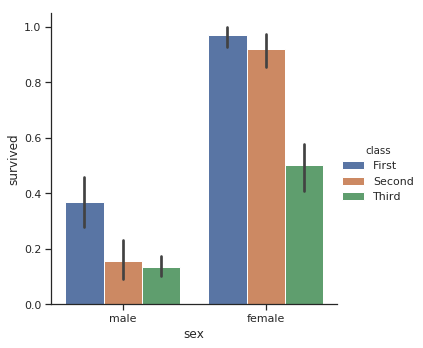

In [24]:
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic)

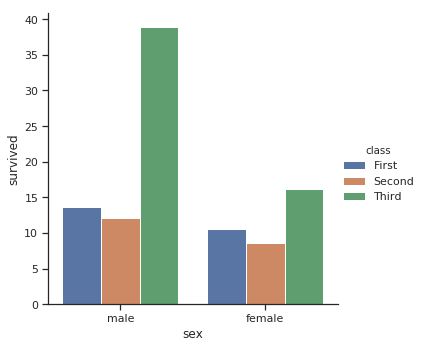

In [25]:
# can you display percentage survived
sns.catplot(x="sex", y="survived", hue="class",estimator= lambda x:(len(x)/len(titanic))*100 ,kind="bar", data=titanic)

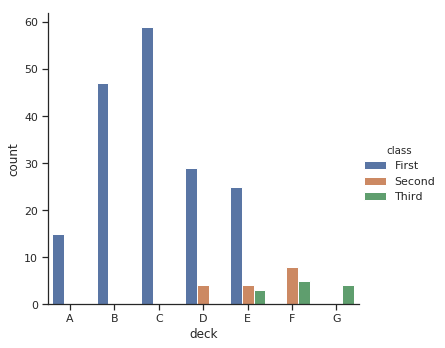

In [27]:
# display by class too
sns.catplot(x="deck", kind="count", hue="class", data=titanic)

# Point plot(same as bar plot but without bar)

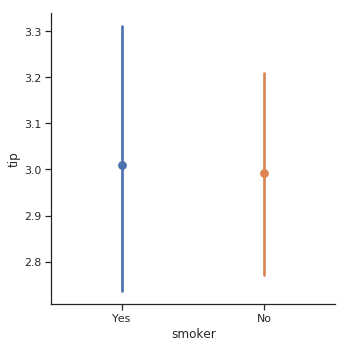

In [28]:
sns.catplot(x="smoker", y="tip", hue= "smoker",kind="point", data=tips)

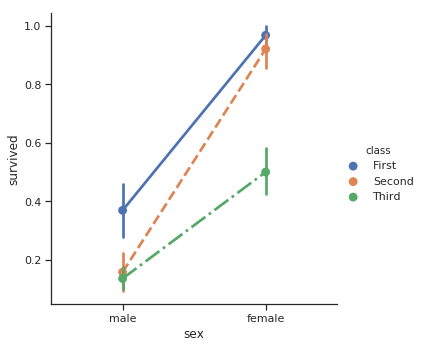

In [29]:
# For black and white compatibility
sns.catplot(x="sex", y="survived", hue="class", kind="point",linestyles=["-", "--", "-."], data=titanic);

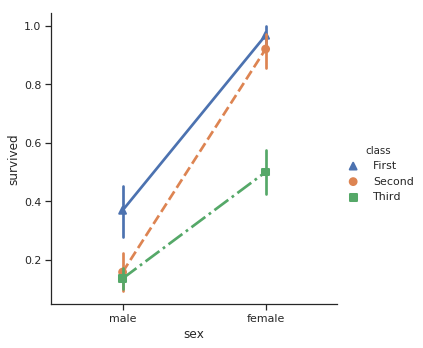

In [31]:
# need to add marker too
sns.catplot(x="sex", y="survived", hue="class", kind="point",markers=["^", "o", "s"],linestyles=["-", "--", "-."], data=titanic);

# multiple relationships with facets(grid or panel charts;)

In [32]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


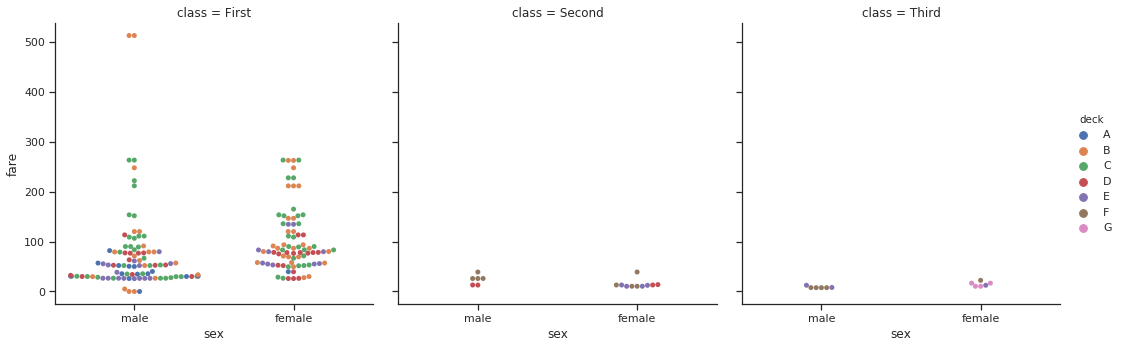

In [33]:
sns.catplot(x="sex", y="fare", hue="deck",
            col="class",
            kind="swarm", data=titanic);

# Visualizing the distribution 

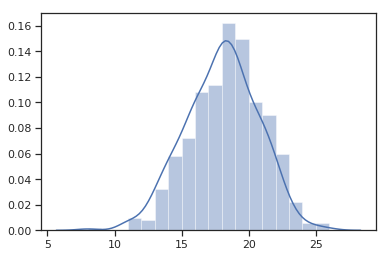

In [34]:
import numpy as np
x = np.random.binomial(30, .6, size = 500)
sns.distplot(x)

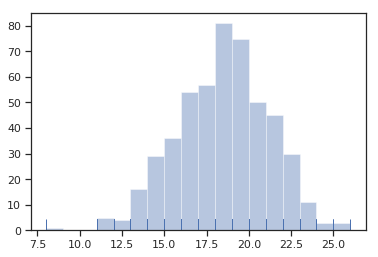

In [38]:
sns.distplot(x,kde=False, rug=True)

# KDE 

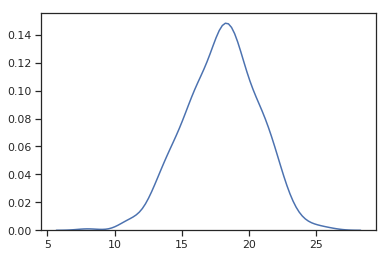

In [39]:
sns.distplot(x, hist=False)

In [40]:
from scipy.stats import expon

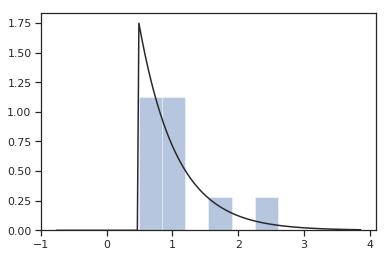

In [41]:
x= np.random.exponential(size = 10)
sns.distplot(x, kde=False, fit=expon)

# Visualizing distribution of two variable

In [42]:
from scipy.stats import multivariate_normal

In [43]:
rv = multivariate_normal([1, 1], 1)

In [45]:
import pandas as pd
x2d= rv.rvs(size=100, random_state=1)
df = pd.DataFrame(x2d, columns=["x1", "x2"])
print(x2d)

[[ 2.62434536e+00  3.88243586e-01]
 [ 4.71828248e-01 -7.29686222e-02]
 [ 1.86540763e+00 -1.30153870e+00]
 [ 2.74481176e+00  2.38793099e-01]
 [ 1.31903910e+00  7.50629625e-01]
 [ 2.46210794e+00 -1.06014071e+00]
 [ 6.77582796e-01  6.15945645e-01]
 [ 2.13376944e+00 -9.98912673e-02]
 [ 8.27571792e-01  1.22141582e-01]
 [ 1.04221375e+00  1.58281521e+00]
 [-1.00619177e-01  2.14472371e+00]
 [ 1.90159072e+00  1.50249434e+00]
 [ 1.90085595e+00  3.16272141e-01]
 [ 8.77109774e-01  6.42305657e-02]
 [ 7.32111920e-01  1.53035547e+00]
 [ 3.08339248e-01  6.03246473e-01]
 [ 3.12827300e-01  1.54794359e-01]
 [ 3.28753869e-01  9.87335401e-01]
 [-1.17310349e-01  1.23441570e+00]
 [ 2.65980218e+00  1.74204416e+00]
 [ 8.08164448e-01  1.12371036e-01]
 [ 2.52841706e-01  2.69245460e+00]
 [ 1.05080775e+00  3.63004353e-01]
 [ 1.19091548e+00  3.10025514e+00]
 [ 1.12015895e+00  1.61720311e+00]
 [ 1.30017032e+00  6.47750154e-01]
 [-1.42518198e-01  6.50657278e-01]
 [ 7.91105767e-01  1.58662319e+00]
 [ 1.83898341e+00  1

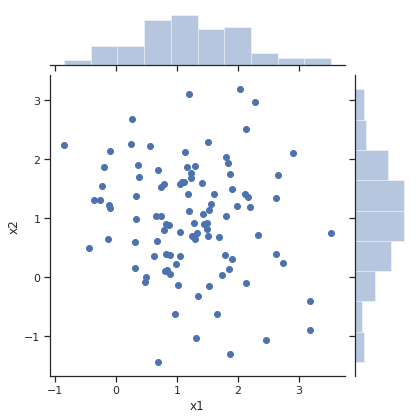

In [46]:
# try changing default from scatter to hex, kde
sns.jointplot(x="x1", y="x2", data=df);

# Pairwise relationships

In [47]:
df_mpg = sns.load_dataset('mpg')
df_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


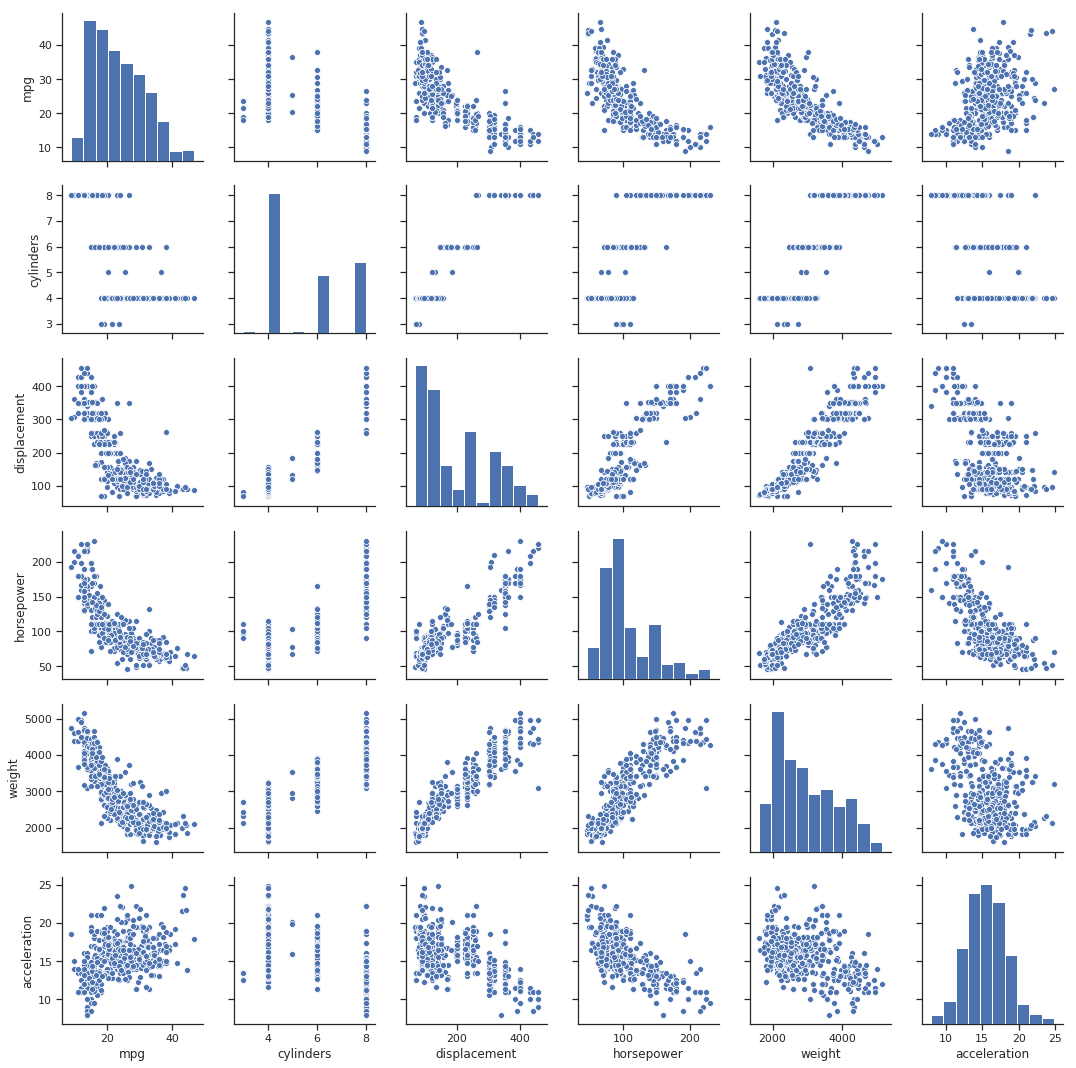

In [49]:
# try chaning diag plot to kde
joint_grid_inst= sns.pairplot(df_mpg.iloc[:, 0:-3])

In [50]:
# pairplot is build on top of PariGrid object
type(joint_grid_inst)

seaborn.axisgrid.PairGrid

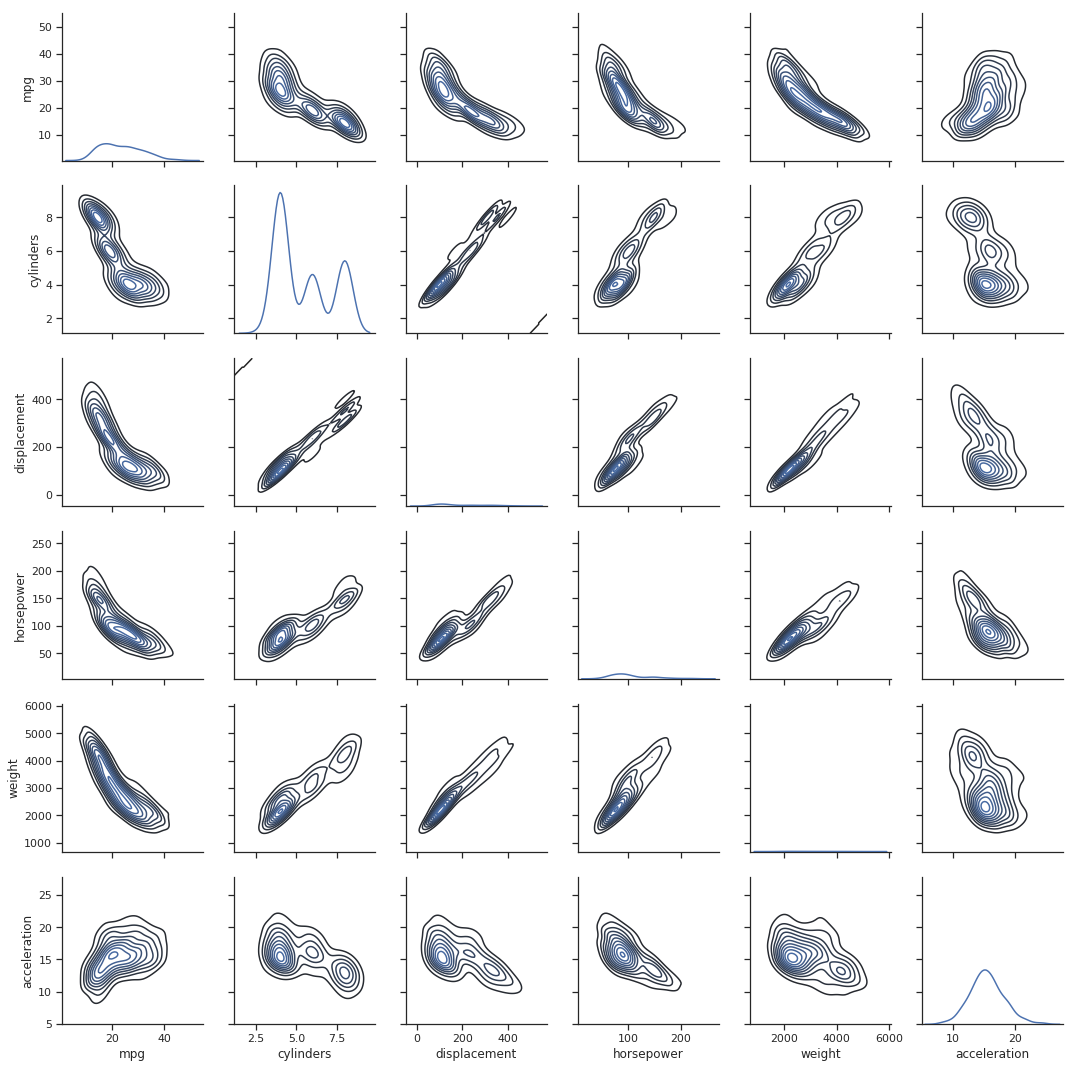

In [52]:
g = sns.PairGrid(df_mpg.iloc[:, 0:-3].dropna())
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot);

# Realtionship(linear) among variables

In [53]:
iris_df = sns.load_dataset('iris')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


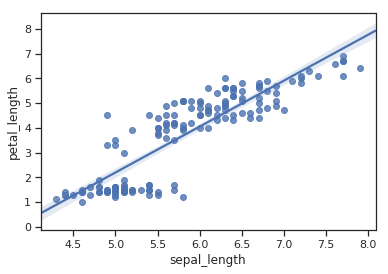

In [54]:
sns.regplot(x="sepal_length", y="petal_length", data=iris_df)

In [ ]:
sns.pairplot(iris_df,)

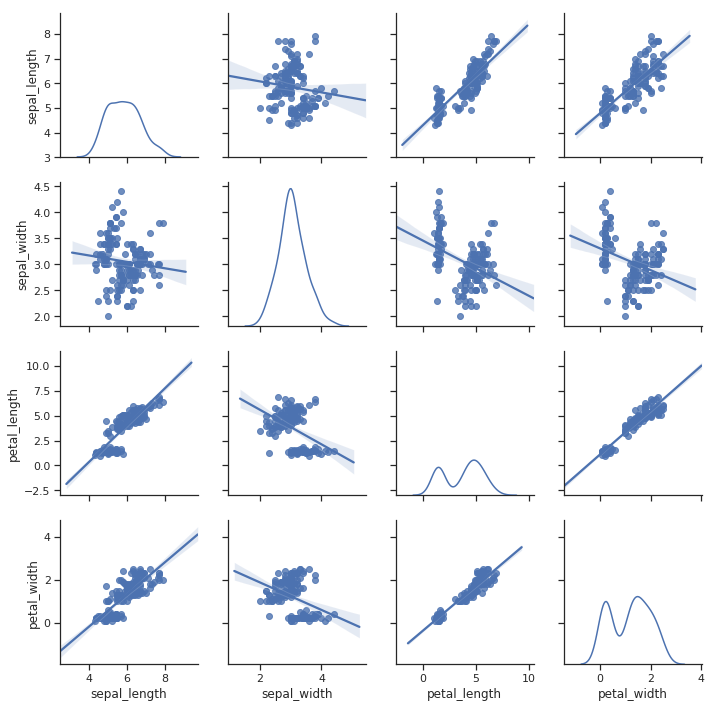

In [55]:
# create a PariGrid and map kdeplot on diagonal and regression of diaglonal
g = sns.PairGrid(iris_df)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.regplot)

# Heatmap

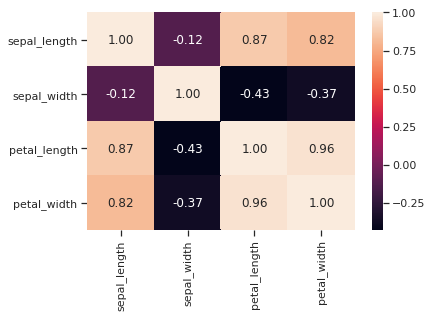

In [58]:

sns.heatmap(iris_df.corr(),annot=True, fmt=".2f")

# Geo map




## [Folium](https://python-visualization.github.io/folium/). It uses Leaflet - a JavaScript library for interactive maps

We are only scratching the surface. It is a bit more involved subject.

In [59]:
!pip install folium

You are using pip version 18.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [60]:
import folium
m = folium.Map(location=[39.6766, -104.9619])
m

# One can  choose different tiles

In [61]:
folium.Map(
    location=[39.675938, -104.960721],
    tiles='Stamen Toner',
    zoom_start=13
)

# Markers

In [62]:
m = folium.Map(
    location=[40.211209, -105.821088],
    zoom_start=11,
    tiles='Stamen Terrain'
)

tooltip = 'Click me!'

folium.Marker([40.249466, -105.827617], popup='<i>Grand lake</i>', tooltip=tooltip).add_to(m)
folium.Marker([40.144075, -105.844817], popup='<b>LAke Granby</b>', tooltip=tooltip).add_to(m)

m

In [63]:


m = folium.Map(
    location=[-0.760488, -90.331771],
    zoom_start=14,
    tiles='Stamen Terrain'
)

folium.Circle(
    radius=100,
    location=[-0.760488, -90.331771],
    popup='Tortuga bay',
    color='crimson',
    fill=False,
).add_to(m)
m

In [64]:
# long latitude pop up
m = folium.Map(
    location=[-0.307781, -90.691985],
    zoom_start=8,
    tiles='Stamen Terrain'
)
m.add_child(folium.LatLngPopup())


m


JeoJson support

http://geojson.org/


In [65]:
!curl -O https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/antarctic_ice_edge.json

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  314k  100  314k    0     0  1392k      0 --:--:-- --:--:-- --:--:-- 1387k


In [66]:
!head -n 10 antarctic_ice_edge.json

{
"type": "FeatureCollection",
"features": [
{ "type": "Feature", "properties": { "scalerank": 5, "featurecla": "Antarctic Ice Shelf Edge" }, "geometry": { "type": "LineString", "coordinates": [ [ 56.688664178296278, -66.860414727647708 ], [ 56.676055128816984, -66.844446710069576 ], [ 56.644119093660606, -66.796335951605784 ], [ 56.682876417879584, -66.783158461371414 ], [ 56.769072706942382, -66.768223972439046 ], [ 56.807830031161359, -66.746209812282643 ], [ 56.800905389234174, -66.741558933376382 ], [ 56.782508579338298, -66.713240248480474 ] ] } }
,
{ "type": "Feature", "properties": { "scalerank": 5, "featurecla": "Antarctic Ice Shelf Edge" }, "geometry": { "type": "LineString", "coordinates": [ [ 76.839888950512204, -69.283057549923001 ], [ 76.84071577342894, -69.282799167761567 ], [ 76.804128859366358, -69.25783945096461 ], [ 76.776533644522431, -69.249054457474983 ], [ 76.751212192699427, -69.248899428178106 ], [ 76.697468703115874, -69.262180271277145 ], [ 76.703359816397096

In [67]:
!curl -O https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/antarctic_ice_shelf_topo.json

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  157k  100  157k    0     0   869k      0 --:--:-- --:--:-- --:--:--  872k


In [68]:
!head antarctic_ice_shelf_topo.json

{"type":"Topology","transform":{"scale":[0.036003599298640235,0.0020699335558555815],"translate":[-179.99998938710374,-85.22210242610454]},"objects":{"antarctic_ice_shelf":{"type":"GeometryCollection","geometries":[{"type":"Polygon","arcs":[[0],[1],[2],[3],[4],[5],[6],[7],[8]]},{"type":"Polygon","arcs":[[9]]},{"type":"Polygon","arcs":[[10]]},{"type":"Polygon","arcs":[[11]]},{"type":"Polygon","arcs":[[12]]},{"type":"Polygon","arcs":[[13]]},{"type":"Polygon","arcs":[[14]]},{"type":"Polygon","arcs":[[15]]},{"type":"Polygon","arcs":[[16]]},{"type":"Polygon","arcs":[[17]]},{"type":"Polygon","arcs":[[18]]},{"type":"Polygon","arcs":[[19]]},{"type":"Polygon","arcs":[[20]]},{"type":"Polygon","arcs":[[21]]},{"type":"Polygon","arcs":[[22]]},{"type":"Polygon","arcs":[[23]]},{"type":"Polygon","arcs":[[24]]},{"type":"Polygon","arcs":[[25]]},{"type":"Polygon","arcs":[[26]]},{"type":"Polygon","arcs":[[27]]},{"type":"Polygon","arcs":[[28]]},{"type":"Polygon","arcs":[[29],[30]]},{"type":"MultiPolygon","

In [69]:

antarctic_ice_edge = 'antarctic_ice_edge.json'
antarctic_ice_shelf_topo = 'antarctic_ice_shelf_topo.json'

m = folium.Map(
    location=[-59.1759, -11.6016],
    tiles='Mapbox Bright',
    zoom_start=2
)

folium.GeoJson(
    antarctic_ice_edge,
    name='geojson'
).add_to(m)

folium.TopoJson(
    open(antarctic_ice_shelf_topo),
    'objects.antarctic_ice_shelf',
    name='topojson'
).add_to(m)

folium.LayerControl().add_to(m)


m

# Choropleth maps

Visualizing a quantity(population density or per-capita income.) using map

In [70]:
!curl -O https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/US_Unemployment_Oct2012.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   367  100   367    0     0    928      0 --:--:-- --:--:-- --:--:--   926


In [71]:
!head -n 10 US_Unemployment_Oct2012.csv

State,Unemployment
AL,7.1
AK,6.8
AZ,8.1
AR,7.2
CA,10.1
CO,7.7
CT,8.4
DE,7.1
FL,8.2


In [72]:
!curl -O https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 87688  100 87688    0     0   253k      0 --:--:-- --:--:-- --:--:--  253k


In [73]:
!head -n 10 us-states.json

{"type":"FeatureCollection","features":[
{"type":"Feature","id":"AL","properties":{"name":"Alabama"},"geometry":{"type":"Polygon","coordinates":[[[-87.359296,35.00118],[-85.606675,34.984749],[-85.431413,34.124869],[-85.184951,32.859696],[-85.069935,32.580372],[-84.960397,32.421541],[-85.004212,32.322956],[-84.889196,32.262709],[-85.058981,32.13674],[-85.053504,32.01077],[-85.141136,31.840985],[-85.042551,31.539753],[-85.113751,31.27686],[-85.004212,31.003013],[-85.497137,30.997536],[-87.600282,30.997536],[-87.633143,30.86609],[-87.408589,30.674397],[-87.446927,30.510088],[-87.37025,30.427934],[-87.518128,30.280057],[-87.655051,30.247195],[-87.90699,30.411504],[-87.934375,30.657966],[-88.011052,30.685351],[-88.10416,30.499135],[-88.137022,30.318396],[-88.394438,30.367688],[-88.471115,31.895754],[-88.241084,33.796253],[-88.098683,34.891641],[-88.202745,34.995703],[-87.359296,35.00118]]]}},
{"type":"Feature","id":"AK","properties":{"name":"Alaska"},"geometry":{"type":"MultiPolygon","coord

In [74]:
import pandas as pd

state_geo = 'us-states.json'

state_unemployment = 'US_Unemployment_Oct2012.csv'
state_data = pd.read_csv(state_unemployment)

m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=state_data,
    columns=['State', 'Unemployment'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Unemployment Rate (%)'
).add_to(m)

folium.LayerControl().add_to(m)

m

# Resources
Look at this gallery

 https://residentmario.github.io/geoplot/gallery.html
 
## Geoplot and geopandas
- https://github.com/ResidentMario/geoplot
- http://geopandas.org/gallery/plotting_with_geoplot.html